# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1l7bHyrjzq839zVZE06cfdDksLabCN2hg"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Future Sales Time-series Prediction 
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1vi45x-LGEzwvJoQstierOC1QZ11QQUmS)

![alt text](https://drive.google.com/uc?id=1eLLebiXwkN6x1dpsopQmkVNkR9zAYL7H)

![alt text](https://drive.google.com/uc?id=1a_q_DC8NyGBmcrxE0sGV4r6Hl-0w6G0K)

![alt text](https://drive.google.com/uc?id=1hNE0Wwc_bCCIO-AUAi6Xqo_9Bf1Xbh2o)

![alt text](https://drive.google.com/uc?id=1lQVgHsXn4Ur61dgYul1G-CmseLLUCEOB)

# TASK #2: IMPORT LIBRARIES AND DATASET 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


TASK #2.1: IMPORT SALES TRAINING DATA

In [ ]:
# You have to include the full link to the csv file containing your dataset
sales_train_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Science/train.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
sales_train_df.head(5)
# almost a million observation 
# 1115 unique stores 
# Note that sales is the target variable (that's what we are trying to predict) 

# Id: transaction ID (combination of Store and date) 
# Store: unique store Id
# Sales: sales/day, this is the target variable 
# Customers: number of customers on a given day
# Open: Boolean to say whether a store is open or closed (0 = closed, 1 = open)
# Promo: describes if store is running a promo on that day or not
# StateHoliday: indicate which state holiday (a = public holiday, b = Easter holiday, c = Christmas, 0 = None)
# SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools
# Data Source: https://www.kaggle.com/c/rossmann-store-sales/data



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
sales_train_df.tail(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017199,1106,2,2013-01-01,0,0,0,0,a,1
1017200,1107,2,2013-01-01,0,0,0,0,a,1
1017201,1108,2,2013-01-01,0,0,0,0,a,1
1017202,1109,2,2013-01-01,0,0,0,0,a,1
1017203,1110,2,2013-01-01,0,0,0,0,a,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [ ]:
# 9 columns in total 
# 8 features, each contains 1017209 data points
# 1 target variable (sales)
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
sales_train_df.duplicated().sum() # no dublicate rows

0

In [ ]:
# Average sales amount per day = 5773 Euros, minimum sales per day = 0, maximum sales per day = 41551 
# Average number of customers = 633, minimum number of customers = 0, maximum number of customers = 7388
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


TASK #2.2: IMPORT STORE INFORMATION DATA

In [ ]:
store_info_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Science/store.csv')
# StoreType: categorical variable to indicate type of store (a, b, c, d)
# Assortment: describes an assortment level: a = basic, b = extra, c = extended
# CompetitionDistance (meters): distance to closest competitor store
# CompetitionOpenSince [Month/Year]: provides an estimate of the date when competition was open
# Promo2: Promo2 is a continuing and consecutive promotion for some stores (0 = store is not participating, 1 = store is participating)
# Promo2Since [Year/Week]: date when the store started participating in Promo2
# PromoInterval: describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

(0.0, 20000.0)

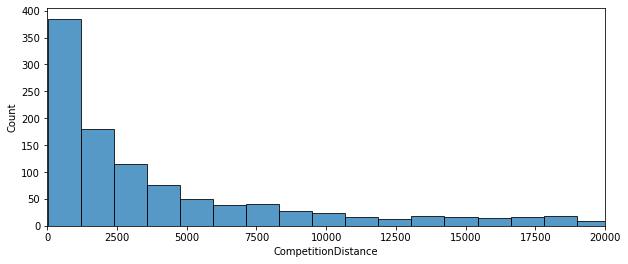

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(x=store_info_df['CompetitionDistance'])
plt.xlim(0,20000)

In [ ]:
# Let's do the same for the store_info_df data
# Note that the previous dataframe includes the transactions recorded per day (in millions)
# This dataframe only includes information about the unique 1115 stores that are part of this study 
store_info_df['Promo2SinceWeek'].describe()

count    571.000000
mean      23.595447
std       14.141984
min        1.000000
25%       13.000000
50%       22.000000
75%       37.000000
max       50.000000
Name: Promo2SinceWeek, dtype: float64

In [ ]:
# on average, the competition distance is 5404 meters away (5.4 kms)
store_info_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,1115.0,558.000000,322.017080,1.0,279.5,558.0,836.5,1115.0
CompetitionDistance,1112.0,5404.901079,7663.174720,20.0,717.5,2325.0,6882.5,75860.0
CompetitionOpenSinceMonth,761.0,7.224704,3.212348,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,761.0,2008.668857,6.195983,1900.0,2006.0,2010.0,2013.0,2015.0
Promo2,1115.0,0.512108,0.500078,0.0,0.0,1.0,1.0,1.0
Promo2SinceWeek,571.0,23.595447,14.141984,1.0,13.0,22.0,37.0,50.0
Promo2SinceYear,571.0,2011.763573,1.674935,2009.0,2011.0,2012.0,2013.0,2015.0


# TASK #3: EXPLORE DATASET

TASK #3.1: EXPLORE SALES TRAINING DATA

In [ ]:
# Let's see if we have any missing data, luckily we don't!
sales_train_df.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

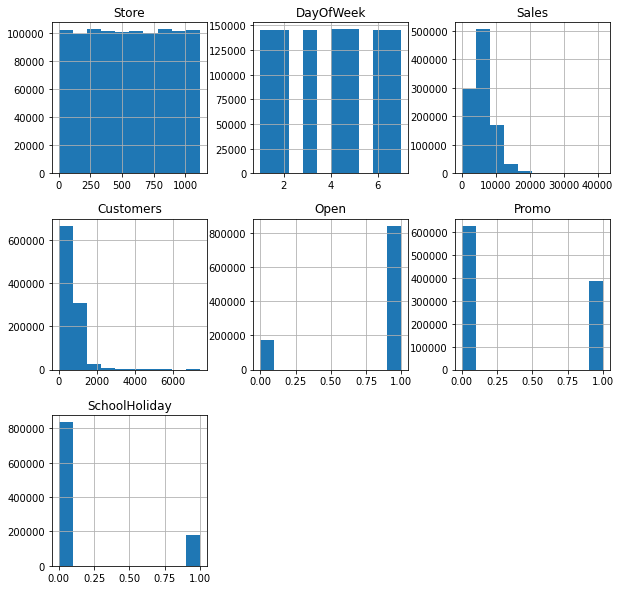

In [ ]:
# Average 600 customers per day, maximum is 4500 (note that we can't see the outlier at 7388!)
# Data is equally distibuted across various Days of the week (~150000 observations x 7 day = ~1.1 million observation) 
# Stores are open ~80% of the time
# Data is equally distributed among all stores (no bias)
# Promo #1 was running ~40% of the time 
# Average sales around 5000-6000 Euros
# School holidays are around ~18% of the time

sales_train_df.hist(figsize=(10,10));

In [ ]:
# Let's see how many stores are open and closed! 
sales_train_df.Open.value_counts()

1    844392
0    172817
Name: Open, dtype: int64

In [ ]:
# only keep open stores and remove closed stores
open_sales_df = sales_train_df[sales_train_df['Open'] == 1]

In [ ]:
# different method - same result
indexes = sales_train_df[sales_train_df['Open'] == 0].index
open_sales_df = sales_train_df.drop(indexes)

In [ ]:
# Let's drop the open column since it has no meaning now
open_sales_df.drop('Open', axis=1, inplace=True)

In [ ]:
open_sales_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


In [ ]:
# Average sales = 6955 Euros,	average number of customers = 762	(went up)

TASK #3.2: EXPLORE STORES INFORMATION DATA

In [ ]:
# Let's see if we have any missing data in the store information dataframe!
store_info_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
# Let's take a look at the missing values in the 'CompetitionDistance'
# Only 3 rows are missing; isna() is the same as isnull() in pandas.DataFrame
store_info_df[store_info_df['CompetitionDistance'].isna()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [ ]:
# Let's take a look at the missing values in the 'CompetitionOpenSinceMonth'
# many rows are missing = 354 (almost one third of the 1115 stores)
store_info_df[store_info_df['CompetitionOpenSinceMonth'].isna()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
# It seems like if 'promo2' is zero, 'promo2SinceWeek', 'Promo2SinceYear', and 'PromoInterval' information is set to zero
# There are 354 rows where 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth' is missing
# Let's set these values to zeros 
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']

In [ ]:
for col in str_cols:
  store_info_df[col].fillna(0, inplace=True)

In [ ]:
# There are 3 rows with 'competitionDistance' values missing, let's fill them up with with average values of the 'CompetitionDistance' column
store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean(), inplace=True)

In [ ]:
store_info_df.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [ ]:
# half of stores are involved in promo 2
# half of the stores have their competition at a distance of 0-3000m (3 kms away)

TASK #3.3: EXPLORE MERGED DATASET 

In [ ]:
# Let's merge both data frames together based on 'store'
sales_all_df = pd.merge(sales_train_df, store_info_df, how='inner', on='Store')

In [ ]:
sales_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [ ]:
sales_all_df.corr()['Sales'].sort_values()[:-1]

DayOfWeek                   -0.462125
Promo2SinceYear             -0.091056
Promo2                      -0.091040
Promo2SinceWeek             -0.044143
CompetitionDistance         -0.019207
CompetitionOpenSinceMonth   -0.012431
CompetitionOpenSinceYear     0.002749
Store                        0.005126
SchoolHoliday                0.085124
Promo                        0.452345
Open                         0.678472
Customers                    0.894711
Name: Sales, dtype: float64

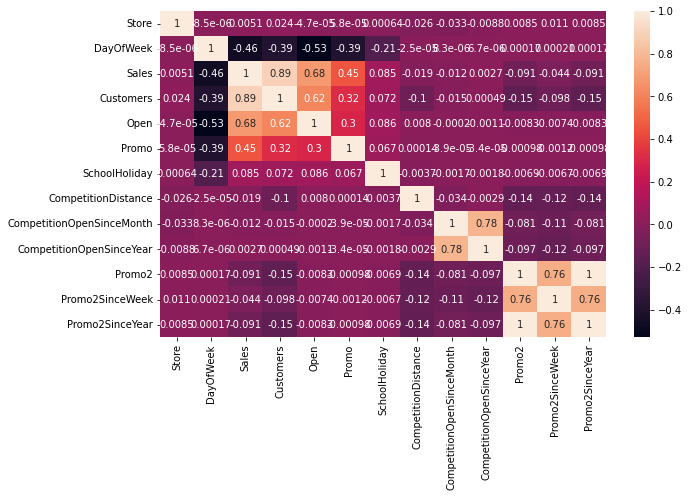

In [ ]:
# customers and promo are positively correlated with the sales 
# Promo2 does not seem to be effective at all
plt.figure(figsize=(10,6))
sns.heatmap(sales_all_df.corr(), annot=True)

In [ ]:

# Customers/Prmo2 and sales are strongly correlated 

In [ ]:
# Let's separate the year and put it into a separate column 
sales_all_df['Year'] = pd.DatetimeIndex(sales_all_df['Date']).year

In [ ]:
sales_all_df.head(1)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015


In [ ]:
# Let's do the same for the Day and Month
sales_all_df['Month'] = pd.DatetimeIndex(sales_all_df['Date']).month
sales_all_df['Day'] = pd.DatetimeIndex(sales_all_df['Date']).day

In [ ]:
sales_all_df.head(1)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31


Text(0.5, 1.0, 'Average Sales per Month with(out) Promo')

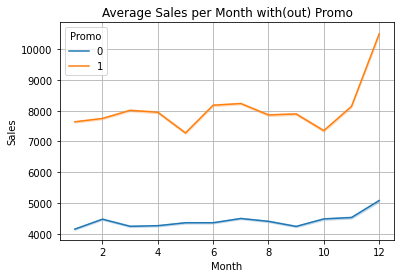

In [ ]:
# Let's take a look at the average sales and number of customers per month 
# 'groupby' works great by grouping all the data that share the same month column, then obtain the mean of the sales column  
# It looks like sales and number of customers peak around christmas timeframe
sns.lineplot(data=sales_all_df, x='Month', y='Sales', hue='Promo')
plt.grid()
plt.title('Average Sales per Month with(out) Promo')

Text(0.5, 1.0, 'Average Customers per Month')

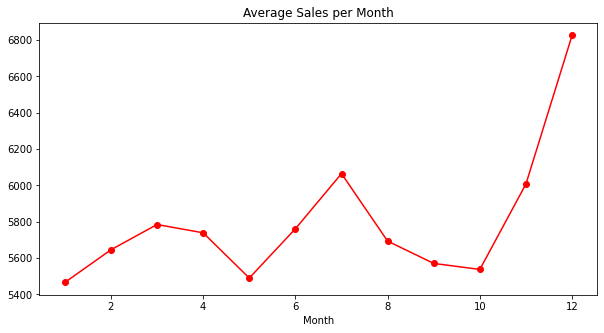

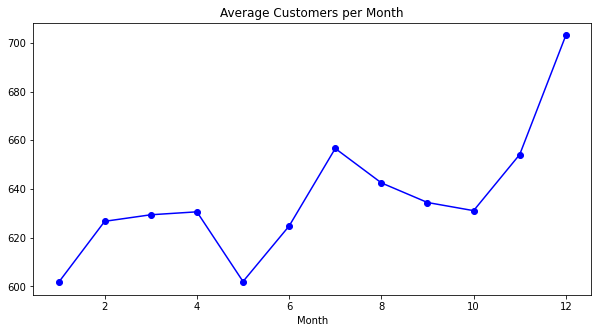

In [ ]:
axis = sales_all_df.groupby('Month')['Sales'].mean().plot(figsize=(10,5), marker='o', color='r')
axis.set_title('Average Sales per Month')

plt.figure()

axis = sales_all_df.groupby('Month')['Customers'].mean().plot(figsize=(10,5), marker='o', color='b')
axis.set_title('Average Customers per Month')

In [ ]:
sales_all_df[['Month', 'Year', 'Customers']].groupby(['Month', 'Year']).sum() # not average but how many customers came during every month in total
# better shown as barplot

Customers
Month Year           
1     2013   20380423
      2014   20893187
      2015   21110481
2     2013   19244468
      2014   19972290
      2015   19481381
3     2013   21969462
      2014   21486733
      2015   21809641
4     2013   20882365
      2014   21345653
      2015   21053991
5     2013   20723886
      2014   21505750
      2015   20193848
6     2013   20473046
      2014   20579912
      2015   21645129
7     2013   22872045
      2014   19299298
      2015   22253888
8     2013   22314232
      2014   18516451
9     2013   20350031
      2014   18667949
10    2013   21371258
      2014   18734892
11    2013   21543868
      2014   18686232
12    2013   23879341
      2014   20800624

Text(0.5, 1.0, 'Average Customers per Day of the Month')

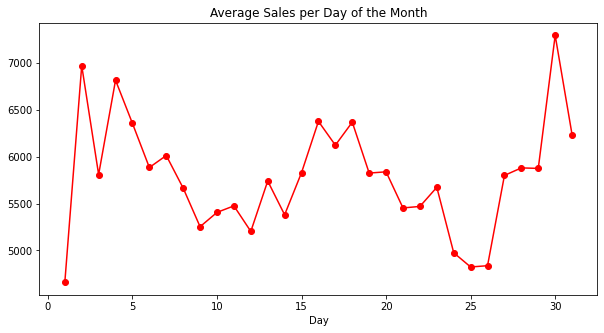

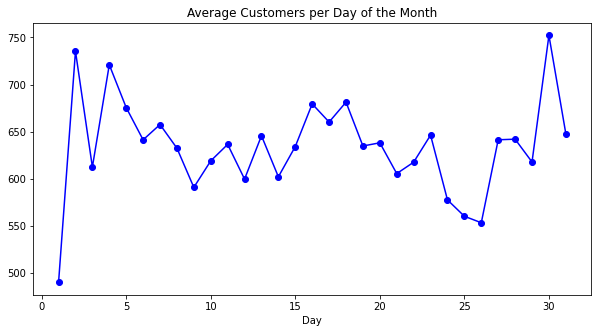

In [ ]:
# Let's take a look at the sales and customers per day of the month instead
# Minimum number of customers are generally around the 24th of the month 
# Most customers and sales are around 30th and 1st of the month

axis = sales_all_df.groupby('Day')['Sales'].mean().plot(figsize=(10,5), marker='o', color='r')
axis.set_title('Average Sales per Day of the Month')

plt.figure()

axis = sales_all_df.groupby('Day')['Customers'].mean().plot(figsize=(10,5), marker='o', color='b')
axis.set_title('Average Customers per Day of the Month')

Text(0.5, 1.0, 'Average Customers per Day of the Week')

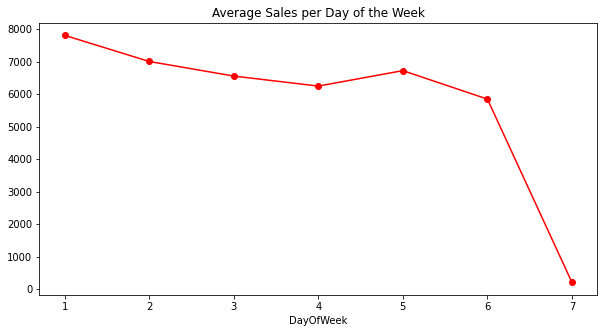

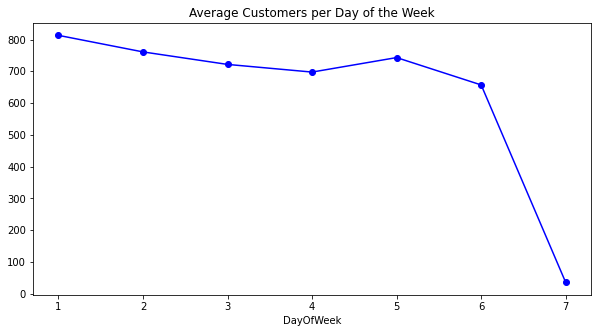

In [ ]:
# Let's do the same for the day of the week  (note that 7 = Sunday)

axis = sales_all_df.groupby('DayOfWeek')['Sales'].mean().plot(figsize=(10,5), marker='o', color='r')
axis.set_title('Average Sales per Day of the Week')

plt.figure()

axis = sales_all_df.groupby('DayOfWeek')['Customers'].mean().plot(figsize=(10,5), marker='o', color='b')
axis.set_title('Average Customers per Day of the Week')

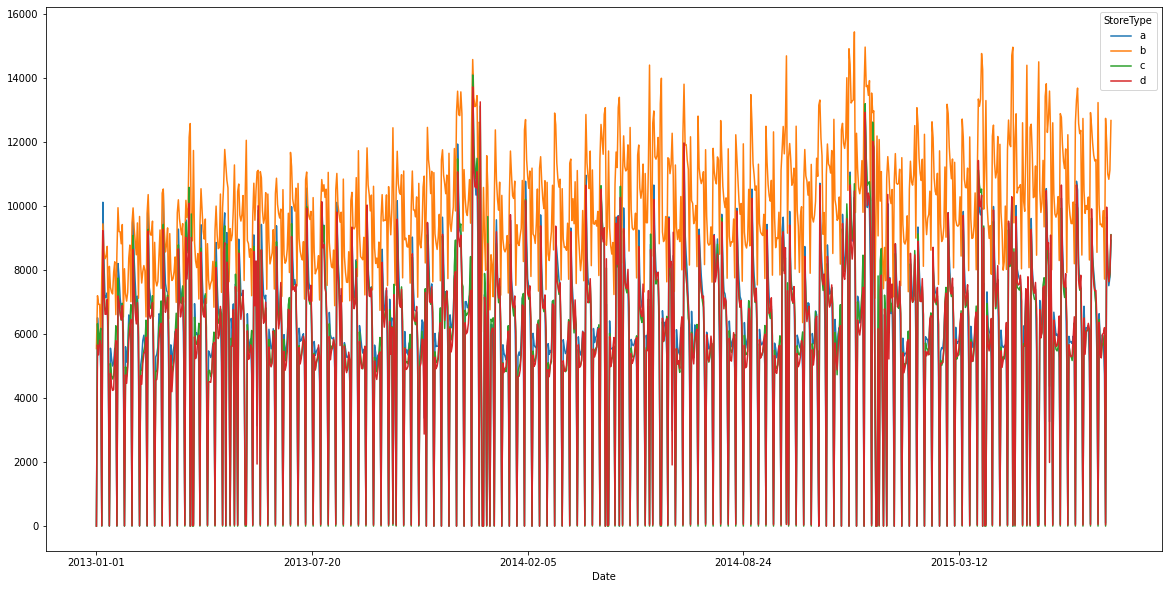

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sales_all_df.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax=ax)

No handles with labels found to put in legend.


<Figure size 1080x720 with 0 Axes>

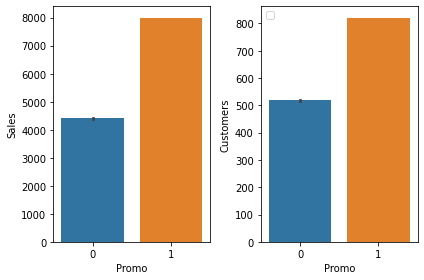

In [ ]:
plt.figure(figsize=[15,10])
fig, axes = plt.subplots(1, 2)
sns.barplot(ax=axes[0], x='Promo', y='Sales', data=sales_all_df)
sns.barplot(ax=axes[1], x='Promo', y='Customers', data=sales_all_df)
plt.legend()
plt.tight_layout()

# TASK #4: UNDERSTAND THE INTUITION BEHIND FACEBOOK PROPHET

![alt text](https://drive.google.com/uc?id=1I4lBgLaqERF_-lpGYLuht02wJmwcLGG-)

![alt text](https://drive.google.com/uc?id=1CZ24f-TbnRzaXV9Arke0fNTUm7Kon1gK)

![alt text](https://drive.google.com/uc?id=16gaoTeeuU5PxNZRHt8n2XyFJ52ft1xb7)

# TASK #5: TRAIN THE MODEL PART A

In [ ]:
# import prophet
!pip install fbprophet
from fbprophet import Prophet

In [ ]:
def sales_predictions(Store_ID, sales_df, periods):

  sales_df = sales_df[sales_df['Store'] == Store_ID]
  sales_df = sales_df[['Date', 'Sales']].rename(columns={'Date': 'ds', 'Sales': 'y'})
  sales_df = sales_df.sort_values('ds')

  model = Prophet()
  model.fit(sales_df)
  future = model.make_future_dataframe(periods=periods)
  forecast = model.predict(future)
  figure = model.plot(forecast, xlabel='Date', ylabel='Sales')
  figure2 = model.plot_components(forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


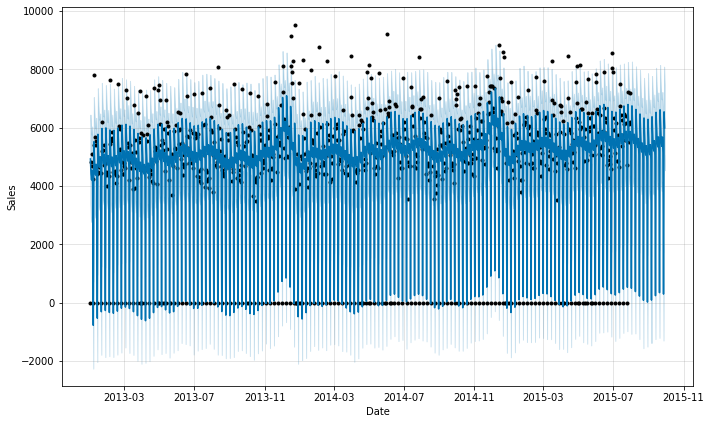

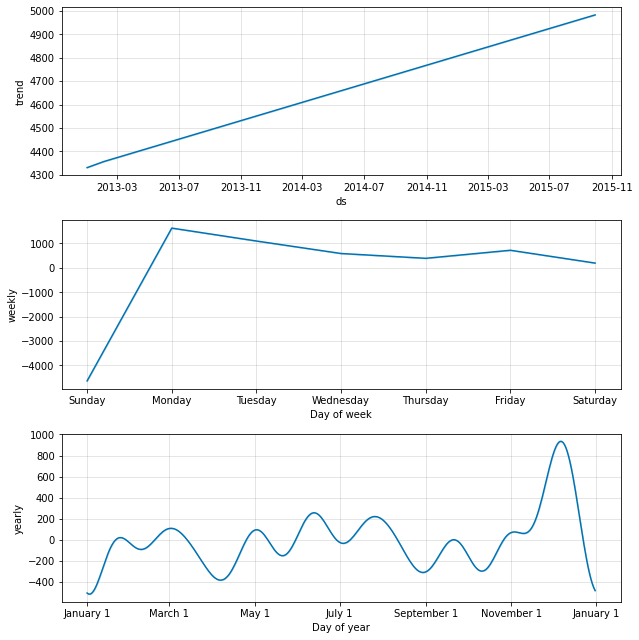

In [ ]:
sales_predictions(10, sales_all_df, 60)

# TASK #6: TRAIN THE MODEL PART B


   - StateHoliday: indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
   - SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools
  






In [ ]:
def sales_predictions(Store_ID, sales_df, holidays, periods):

  sales_df = sales_df[sales_df['Store'] == Store_ID]
  sales_df = sales_df[['Date', 'Sales']].rename(columns={'Date': 'ds', 'Sales': 'y'})
  sales_df = sales_df.sort_values('ds')

  model = Prophet(holidays=holidays)
  model.fit(sales_df)
  future = model.make_future_dataframe(periods=periods)
  forecast = model.predict(future)
  figure = model.plot(forecast, xlabel='Date', ylabel='Sales')
  figure2 = model.plot_components(forecast)

In [ ]:
# Get all the dates pertaining to school holidays 
school_holidays = sales_all_df[sales_all_df['SchoolHoliday'] == 1].loc[:, 'Date'].values

In [ ]:
school_holidays.shape

(181721,)

In [ ]:
# Get all the dates pertaining to state holidays 
state_holidays = sales_all_df[(sales_all_df['StateHoliday'] == 'a') | (sales_all_df['StateHoliday'] == 'b') | (sales_all_df['StateHoliday'] == 'c')].loc[:, 'Date'].values

In [ ]:
state_holidays.shape

(31050,)

In [ ]:
state_holidays = pd.DataFrame({'ds': pd.to_datetime(state_holidays), 'holiday': 'state_holidays'})

In [ ]:
school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holidays), 'holiday': 'school_holidays'})

In [ ]:
# concatenate both school and state holidays 
school_state_holiday = pd.concat([state_holidays, school_holidays])

In [ ]:
school_state_holiday

,ds,holiday
0,2015-06-04,state_holidays
1,2015-05-25,state_holidays
2,2015-05-14,state_holidays
3,2015-05-01,state_holidays
4,2015-04-06,state_holidays
...,...,...
181716,2013-01-05,school_holidays
181717,2013-01-04,school_holidays
181718,2013-01-03,school_holidays
181719,2013-01-02,school_holidays


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


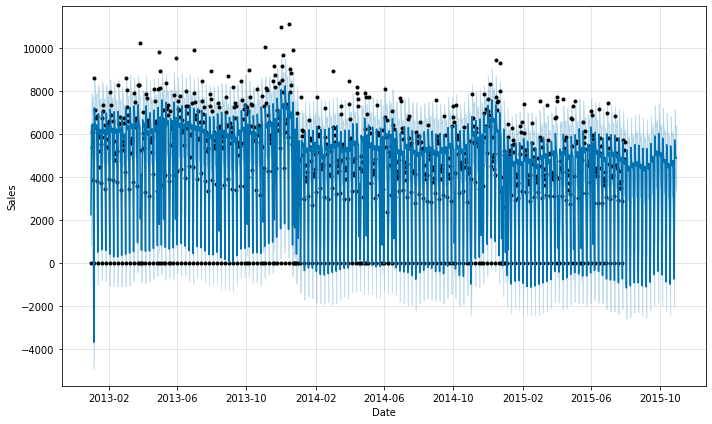

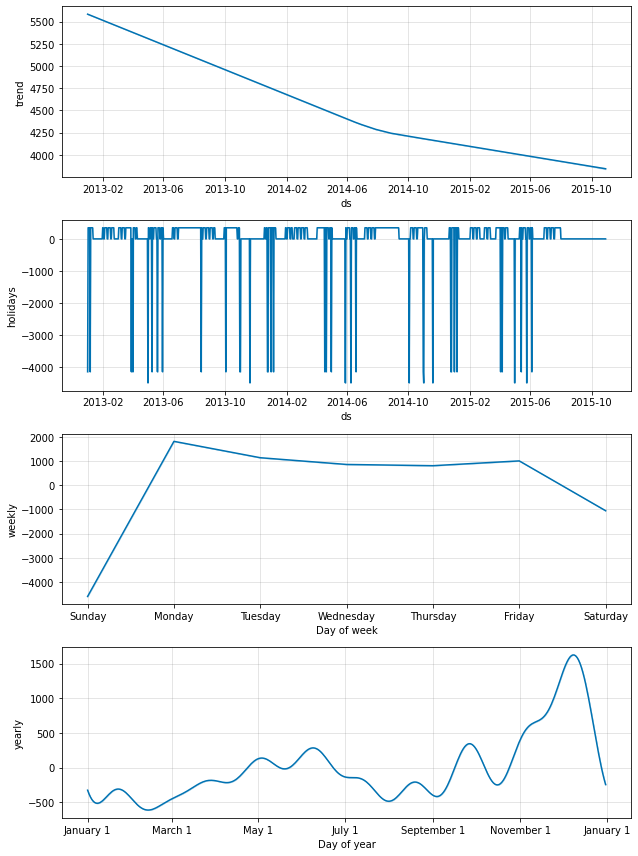

In [ ]:
# Let's make predictions using holidays for a specific store
sales_predictions(6, sales_all_df, school_state_holiday, 90)

# EXCELLENT JOB!